<a href="https://colab.research.google.com/github/KyleSprague/DCS_210/blob/main/DCS_210_Project5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
install.packages("tidyverse") 
install.packages("tidymodels") 
install.packages("openintro") 
install.packages("ggpubr") 
library(ggpubr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [54]:
library("tidyverse") 
library("tidymodels") 
library("openintro")

In [55]:
#glimpse(evals) 

help(evals) 
evals 



course_id,prof_id,score,rank,ethnicity,gender,language,age,cls_perc_eval,cls_did_eval,⋯,cls_credits,bty_f1lower,bty_f1upper,bty_f2upper,bty_m1lower,bty_m1upper,bty_m2upper,bty_avg,pic_outfit,pic_color
<int>,<int>,<dbl>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,⋯,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<fct>,<fct>
1,1,4.7,tenure track,minority,female,english,36,55.81395,24,⋯,multi credit,5,7,6,2,4,6,5.000,not formal,color
2,1,4.1,tenure track,minority,female,english,36,68.80000,86,⋯,multi credit,5,7,6,2,4,6,5.000,not formal,color
3,1,3.9,tenure track,minority,female,english,36,60.80000,76,⋯,multi credit,5,7,6,2,4,6,5.000,not formal,color
4,1,4.8,tenure track,minority,female,english,36,62.60163,77,⋯,multi credit,5,7,6,2,4,6,5.000,not formal,color
5,2,4.6,tenured,not minority,male,english,59,85.00000,17,⋯,multi credit,4,4,2,2,3,3,3.000,not formal,color
6,2,4.3,tenured,not minority,male,english,59,87.50000,35,⋯,multi credit,4,4,2,2,3,3,3.000,not formal,color
7,2,2.8,tenured,not minority,male,english,59,88.63636,39,⋯,multi credit,4,4,2,2,3,3,3.000,not formal,color
8,3,4.1,tenured,not minority,male,english,51,100.00000,55,⋯,multi credit,5,2,5,2,3,3,3.333,not formal,color
9,3,3.4,tenured,not minority,male,english,51,56.92308,111,⋯,multi credit,5,2,5,2,3,3,3.333,not formal,color


Warning message in geom_histogram(bindwidth = 5, fill = "#2b8cbe"):
“Ignoring unknown parameters: `bindwidth`”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


mean,range,median
<dbl>,<dbl>,<dbl>
4.17473,0.8,4.3


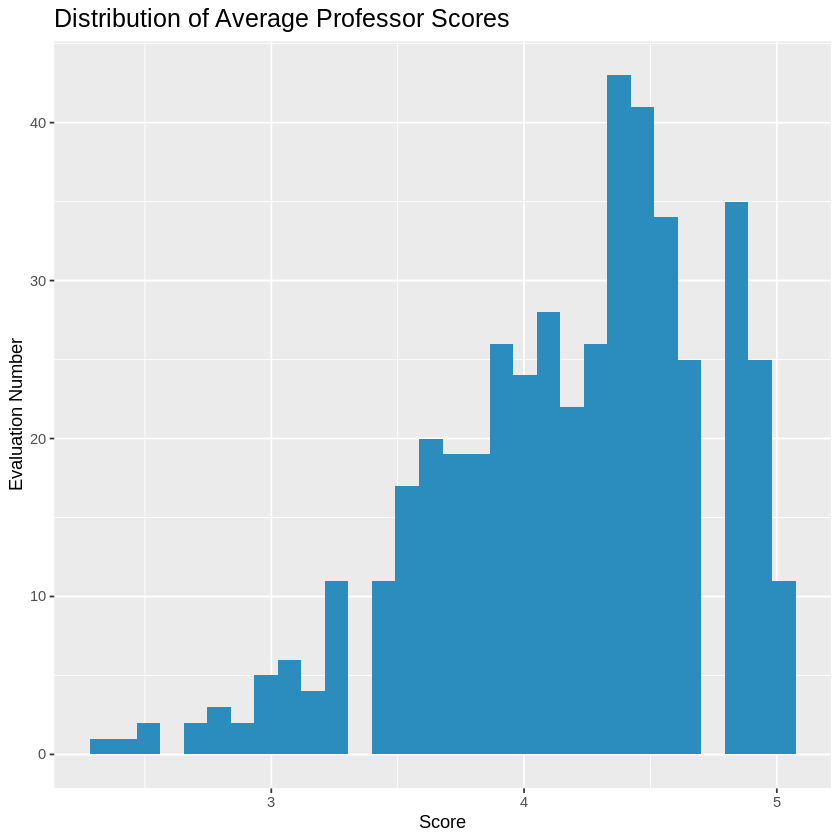

In [56]:
##Code for question 1 
ggplot(data = evals, aes(x = score)) + 
  geom_histogram(bindwidth = 5, fill = "#2b8cbe") +   
  ggtitle("Distribution of Average Professor Scores") +
  theme(plot.title = element_text(size=15)) +
  labs(x = "Score", y = "Evaluation Number")
  #theme_minimal()

data <- evals %>% 
  select(score) %>%
  summarize(mean = mean(score), range = IQR(score), median = median(score))  

data


##ANSWER TO QUESTION 1: 

The distribution has a definite leftward skew. Since score is defined as the average professor score, this graph actually does not tell us about how students rate courses, but rather how they rate the professors who teach them. The skew to the right is expected given that most people tend to rate their professors favorably overall. The graphical result is in alignment with our expectations, based on the fact that our IQR is very small, just 0.8, centered about a median value of 4.3. 

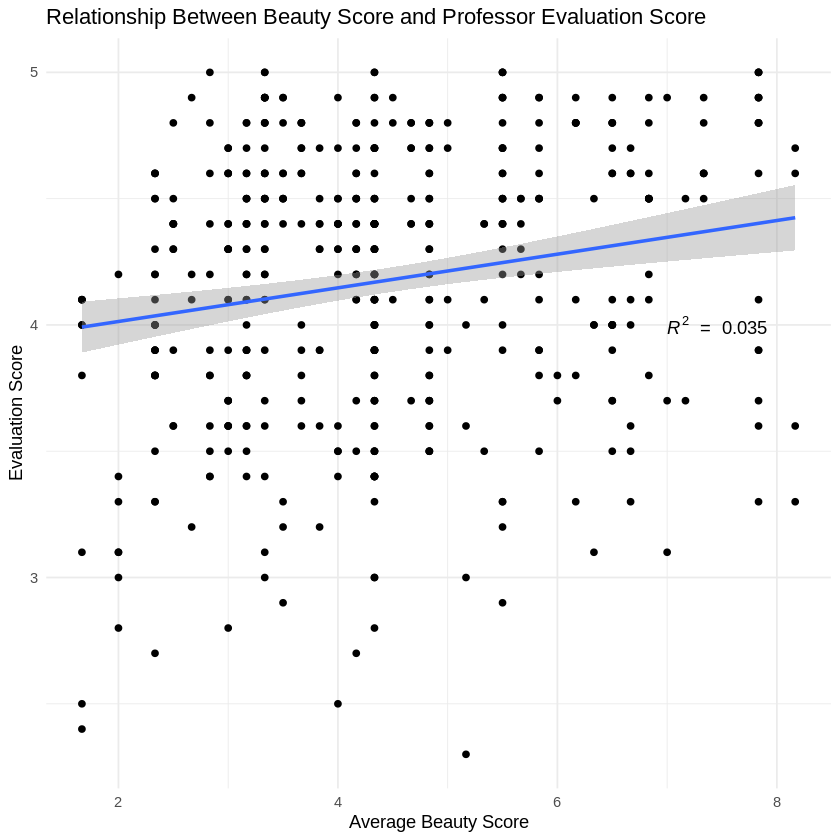

In [57]:
#code for question 2

#bty_average is the average beauty rating of the professor 

ggplot(data = evals, aes(x= bty_avg, y = score)) + 
  geom_point() + 
  labs(x = "Average Beauty Score", y = "Evaluation Score") + 
  ggtitle("Relationship Between Beauty Score and Professor Evaluation Score") +
  geom_smooth(method = "lm", formula = y~x) +
  theme_minimal() +
  stat_regline_equation(label.y = 4, label.x = 7, aes(label = ..rr.label..)) 

  #formatting for R^2: https://www.roelpeters.be/how-to-add-a-regression-equation-and-r-squared-in-ggplot2/


##ANSWER TO QUESTION 2 

There is a slight correlation (R^2 = 0.04) between the explanatory variable (bty_avg) and response variable (score). 

`geom_smooth()` using formula = 'y ~ x'


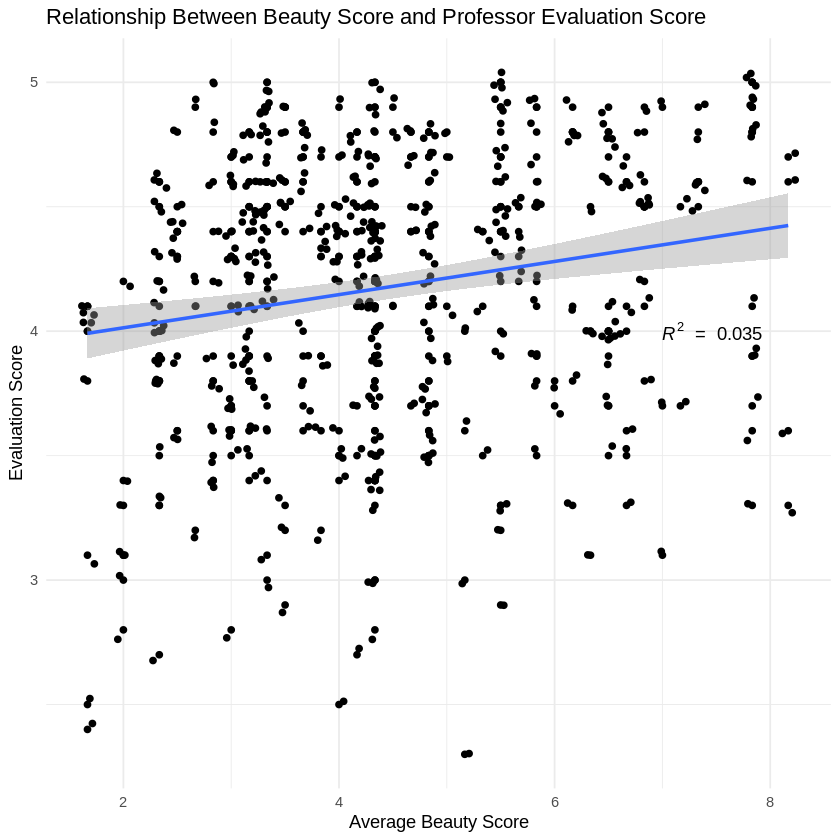

In [58]:
#Code for question 3 


ggplot(data = evals, aes(x= bty_avg, y = score)) + 
  geom_point() +  
  geom_jitter() +
  labs(x = "Average Beauty Score", y = "Evaluation Score") + 
  ggtitle("Relationship Between Beauty Score and Professor Evaluation Score") +
  geom_smooth(method = "lm") +
  theme_minimal() +
  stat_regline_equation(label.y = 4, label.x = 7, aes(label = ..rr.label..)) 

##ANSWER TO QUESTION 3 

Jitter means slightly adjusting the points so that they are not overlapping. The initial scatterplot shows a clean distribution of points; the jitter shows to us that we just have many overlapping points that can not be seen. 

In [59]:
##Code for question 4
#bty_avg is the explanatory variable 
#score is the response variable 
#model is called bty_avg 
#model type is linear 

score_bty_fit <- linear_reg() %>%
  set_engine("lm") %>%
  fit(score ~ bty_avg, data = evals) %>% 
  tidy() 

score_bty_fit

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),3.88033795,0.07614297,50.961212,1.561043e-191
bty_avg,0.06663704,0.01629115,4.090382,5.082731e-05


##ANSWER to Question 4 

Our model predicts an intercept of 3.88 and a slope of 0.06; thus, our model equation is  

$\hat{score} = 3.88 + 0.06 x$. 


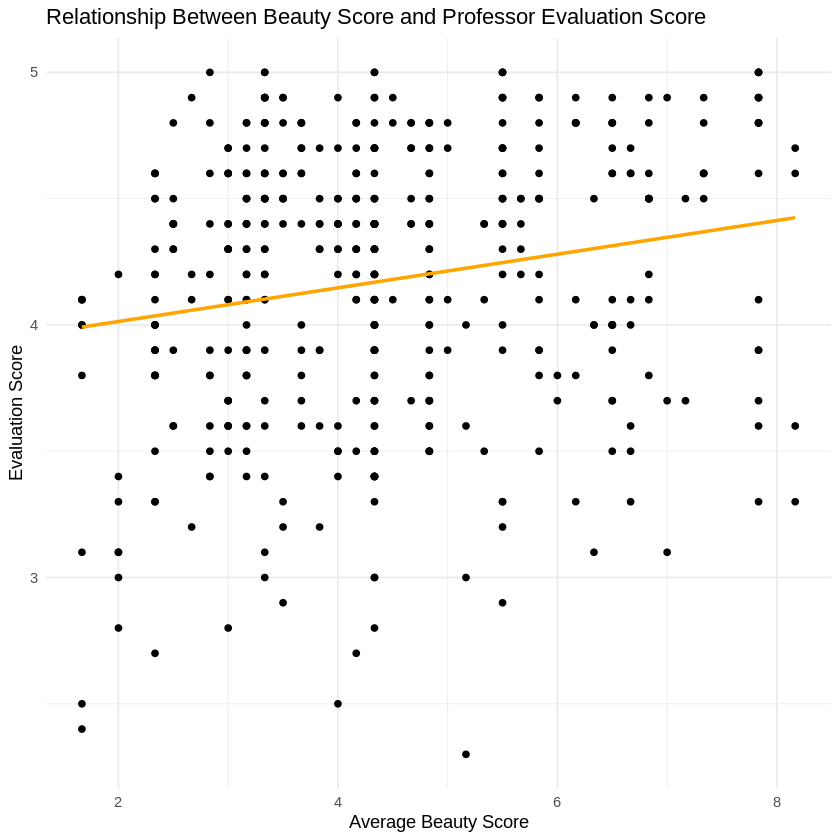

In [60]:
#code/ANSWER for question 5 

ggplot(data = evals, aes(x= bty_avg, y = score)) + 
  geom_point() +  
  labs(x = "Average Beauty Score", y = "Evaluation Score") + 
  ggtitle("Relationship Between Beauty Score and Professor Evaluation Score") +
  geom_smooth(method = "lm", formula = y~x, color = "orange", se = FALSE) +
  theme_minimal() 

##ANSWER TO QUESTION 6 

The slope of 0.06 tells us that there is a slightly positive relationship between average beauty score and professor rating for a particular class. This implies that there is a very small, positive correlation between perceived attractiveness of a professor and perceived performace. 

##ANSWER TO QUESTION 7 

The intercept tells us that for a beauty rating of zero, the average professor score is 3.88. Since there is almost no correlation between professor beauty rating and the evaluation score they received, this result would make sense, if not for the probability of receiving a 0 for attractiveness being almost nothing. Because receiving a 0 for an attractiveness rating would not happen, the intercept alone does not make sense. It implies that even if a professor is not considered attractive, they are, based on the average of all professors, still likely to receive a nonzero evaluation score. 

In [61]:
#code for question 8

#to get the r^2 value, we need to use 
#b1 = rsy/sx where sy is the standard deviation in the y values 
#and sx is the standard deviation in the x values 

#rearranging, we have (b1*sx)/sy = r and R^2 = r^2 

sx = evals %>% 
  select(bty_avg) %>%
  summarize(std = sd(bty_avg))  
sx_working = 1.53

sy = evals %>% 
  select(score) %>% 
  summarize(std = sd(score))   

sy_working = 0.54  
b1 = 0.06

r = (sx_working * b1)/sy_working 
r_2 = r*r 
r_2 

model_for_r_squared <- lm(data = evals, score~bty_avg) 
summary(model_for_r_squared)$r.squared


[1] 0.0289

[1] 0.03502226

##ANSWER TO QUESTION 8: 

Using GGPubr, I obtained an $R^2$ value of 0.035; for a hand calculation (with more rounding error involved as I rounded to two significant figures), I obtained an $R^2$ value of approximately 0.03. The r.squared call gives back an r_sqr 0.035 as well, so it is safe to assume that 0.035 is correct. This value represents the variability in score that can be explained by professor beauty. Given that the $R^2$ value is so low, we know that for the most part, beauty does not effect the evaluation score received by a professor. 

In [62]:
##Code for quesiton 9  


score_gender_fit <- linear_reg() %>%
  set_engine("lm") %>%
  fit(score ~ factor(gender), data = evals) %>%
  tidy()     


score_gender_fit  





term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),4.0928205,0.03866539,105.852305,0.000000000
factor(gender)male,0.1415078,0.05082127,2.784422,0.005582967


In [63]:
#code for question 9 
#Fit a multiple linear regression model, predicting average professor evaluation score 
#based on average beauty rating (bty_avg) and gender. Name the model score_bty_gender_fit. 
#Interpret the intercept and the slopes of bty_avg and gender. 

#female is the baseline 


score_bty_gender_fit <- linear_reg() %>%
  set_engine("lm") %>%
  fit(score ~ bty_avg + gender, data = evals) %>%
  tidy()   

evals_new <- evals %>%
  mutate(
    gender = fct_recode(
      gender,
      '0' = "male",
      '1' = "female",
    )
  )     

score_bty_gender_fit 

#now plot by changing the baseline to see how the slope is altered 


score_bty_gender_fit_f_base <- linear_reg() %>%
  set_engine("lm") %>%
  fit(score ~ bty_avg + gender, data = evals_new) %>%
  tidy() 

score_bty_gender_fit_f_base

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),3.74733824,0.08465506,44.265966,6.227341e-168
bty_avg,0.07415537,0.01625217,4.562799,6.484052e-06
gendermale,0.17238955,0.05022098,3.432620,6.518024e-04


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),3.74733824,0.08465506,44.265966,6.227341e-168
bty_avg,0.07415537,0.01625217,4.562799,6.484052e-06
gender0,0.17238955,0.05022098,3.432620,6.518024e-04


##ANSWER TO QUESTION 9 

The bty_avg slope tells us that all else held constant, for each increase by 1 in the bty_avg, the evaluation score increases by 0.074. The gender slope tells us that for someone who identifies as male--with all else held constant--their average evaluation score will increase by 0.17 compared to a female baseline. The intercept tells us that for a beauty average of zero and a gender of male, 
the evaluation score is 

$\hat{score} =   3.7 + 0.17$  <br> 
$\hat{score} =   3.87$ <br>

Similarly, if the bty_avg is zero and gender of female, the evaluation score is 

$\hat{score} =   3.7$ 

If we expect little correlation between beauty average and score (see above), then the intercept seems more reasonable (not morally, of course). If we switch the baseline to be male, then we see that






In [64]:
#code for question 10 

#DOES NOT WORK 

#evals_new <- evals %>%
#  mutate(
#    gender = fct_recode(
#      gender,
#      '0' = "male",
#      '1' = "female",
#    )
#  )   

#score_gender_fit_two <- linear_reg() %>%
#  set_engine("lm") %>%
#  fit(score ~ gender == "Male", data = evals_new) %>%
#  tidy()     

#score_gender_fit_two

data <- lm(score ~ gender == "Male", data = evals) #setting male as baseline
tidy(data) 

data_female_base_line <- lm(score ~ gender == "Male", data = evals) 
tidy(data_female_base_line)


#data2 = lm(score ~ gender == "Female", data = evals) 
#tidy(data2)


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),4.17473,0.02527553,165.1689,0
"gender == ""Male""TRUE",NA,NA,NA,NA


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),4.17473,0.02527553,165.1689,0
"gender == ""Male""TRUE",NA,NA,NA,NA


##ANSWER TO QUESTION 10 

**********************************************

For male professors, the equation is 

$\hat{score} =   4.09 + 0.14male$  <br> 
$\hat{score} =   4.23$ <br>
$\hat{y} =   4.23$ . 

For female professors, the equation is  

$\hat{score} =   4.09 + 0.14female$ <br> 
$\hat{y} =   4.09$ . 

For each gender, individually, we have a line with zero slope at a specific score. There can be no slope for a categorical variable, only between categorical variables. 





In [65]:
#code for question 11

#evals %>% 
  #select(rank) %>%
  #filter(rank != "tenure track" & rank != "tenured") 

#options are teaching, tenure track, and tenured (aka multiple categorical predictors; teaching is baseline) 

score_rank_fit <- linear_reg() %>%
  set_engine("lm") %>%
  fit(score ~ factor(rank), data = evals) %>%
  tidy()  

score_rank_fit

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),4.2843137,0.05365284,79.852504,1.021033e-271
factor(rank)tenure track,-0.1296841,0.07481531,-1.733390,8.369651e-02
factor(rank)tenured,-0.1451833,0.06355455,-2.284389,2.280338e-02


##ANSWER TO QUESTION 11:  

Our equation for the score_rank_fit linear model is 

$\hat{score} = 4.28 - 0.13rank_{tenure track} - 0.15rank_{tenured}$, 

where $rank_{tenuretrack}$ and $rank_{tenured}$ represent categorical values that are measured relative to teaching professors. The result implies that the average evaluation score for teaching professors is 4.28 when tenured and tenure track are both 0 (false). The slope of -0.13 for tenure track professors tells us that relative to teaching professors, tenure tracked professors are rated 13% lower; the slope of -0.15 for tenured professors tells us that, relative to teaching professors, tenured professors are rated 15% lower, on average. The intercept of 4.28 tells us that the average teaching professor has an evaluation score of 4.28. The intercept makes sense in this context because we can expect that a teaching professor will have some base score. 



In [66]:
##Code for question 12   

evals_new <- cbind(evals)

evals_new$rank_relevel <- relevel(evals$rank, ref = "tenure track")  
levels(evals_new$rank_relevel) 


#rank_level <- relevel(evals_new$score_rank_fit,  ref = "tenured_track") 



[1] "tenure track" "teaching"     "tenured"

In [67]:
#code for question 13 

score_rank_relevel_fit <- linear_reg() %>%
  set_engine("lm") %>%
  fit(score ~ rank_relevel, data = evals_new) %>%
  tidy()   

score_rank_relevel_fit 

#calculating R squared 

r_squared_model <- lm(data = evals_new, score~rank_relevel)  
r_squared_model
summary(r_squared_model)$r.squared




term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),4.15462963,0.05214119,79.6803772,2.577096e-271
rank_relevelteaching,0.12968410,0.07481531,1.7333898,8.369651e-02
rank_releveltenured,-0.01549919,0.06228368,-0.2488484,8.035891e-01



Call:
lm(formula = score ~ rank_relevel, data = evals_new)

Coefficients:
         (Intercept)  rank_relevelteaching   rank_releveltenured  
              4.1546                0.1297               -0.0155  


[1] 0.01162894

##ANSWER to Question 13 

Our equation for the score_rank_relevel_fit linear model is 

$\hat{score} = 4.15 + 0.13rank_{teaching} - 0.02rank_{tenured}$, 

where $rank_{teaching}$ and $rank_{tenured}$ represent categorical values that are measured relative to tenure track professors. The slope 0.13 for teaching represents the percent (13%) increase in evaluation score for teaching professors relative to the tenure track baseline. The slope of -0.02 for tenured represents the percent drop (2%) in evaluation scores relative to the tenure track baseline. The intercept of 4.15 is the baseline score for the average tenure track professor, and makes sense because we expect an average rating. The $R^2$ value of 0.01 tells us that the percent variability in the score explained by the regression model is very small (just 1%). This means that our model is not a very good fit. If we add more explanatory variables, we should see $R^2$ rise, which is why it is usually a good idea, for multiple explanatory variables, to use adjusted $R^2$ instead.

In [68]:
evals_new

course_id,prof_id,score,rank,ethnicity,gender,language,age,cls_perc_eval,cls_did_eval,⋯,bty_f1lower,bty_f1upper,bty_f2upper,bty_m1lower,bty_m1upper,bty_m2upper,bty_avg,pic_outfit,pic_color,rank_relevel
<int>,<int>,<dbl>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<fct>,<fct>,<fct>
1,1,4.7,tenure track,minority,female,english,36,55.81395,24,⋯,5,7,6,2,4,6,5.000,not formal,color,tenure track
2,1,4.1,tenure track,minority,female,english,36,68.80000,86,⋯,5,7,6,2,4,6,5.000,not formal,color,tenure track
3,1,3.9,tenure track,minority,female,english,36,60.80000,76,⋯,5,7,6,2,4,6,5.000,not formal,color,tenure track
4,1,4.8,tenure track,minority,female,english,36,62.60163,77,⋯,5,7,6,2,4,6,5.000,not formal,color,tenure track
5,2,4.6,tenured,not minority,male,english,59,85.00000,17,⋯,4,4,2,2,3,3,3.000,not formal,color,tenured
6,2,4.3,tenured,not minority,male,english,59,87.50000,35,⋯,4,4,2,2,3,3,3.000,not formal,color,tenured
7,2,2.8,tenured,not minority,male,english,59,88.63636,39,⋯,4,4,2,2,3,3,3.000,not formal,color,tenured
8,3,4.1,tenured,not minority,male,english,51,100.00000,55,⋯,5,2,5,2,3,3,3.333,not formal,color,tenured
9,3,3.4,tenured,not minority,male,english,51,56.92308,111,⋯,5,2,5,2,3,3,3.333,not formal,color,tenured


In [69]:
##Code for question 14

evals_final <- evals_new %>% 
  mutate(
    tenure_eligible = ifelse(rank != "teaching", "Yes", "No")
  ) 

#evals_final %>% 
#  filter(rank == "teaching")  

#no is baseline



In [70]:
##code for question 15 

#code for question 13  


score_tenure_eligible_fit <- linear_reg() %>%
  set_engine("lm") %>%
  fit(score  ~ tenure_eligible, data = evals_final) %>%
  tidy()    

score_tenure_eligible_fit

#calculating R squared 

r_squared_model <- lm(data = evals_final, score~ tenure_eligible)  
r_squared_model
summary(r_squared_model)$r.squared 




term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),4.2843137,0.05359823,79.933873,2.723351e-272
tenure_eligibleYes,-0.1405464,0.06069981,-2.315434,2.102730e-02



Call:
lm(formula = score ~ tenure_eligible, data = evals_final)

Coefficients:
       (Intercept)  tenure_eligibleYes  
            4.2843             -0.1405  


[1] 0.01149589

##ANSWER TO QUESTION 15: 

The linear model for score_tenure_eligible_fit is described by the equation: 
$\hat{score} = 4.28 - 0.14_{tenure  eligible}$. 
The slope tells us that if a professor is tenure track or tenured, their average rating is (14% less) compared to the average non-tenure eligible professor, whose average rating is represented by the y-intercept (4.28). We expect that the average teaching professor will have a nonzero rating, so the intercept makes sense. The $R^2$ value of 0.02 tells us that the percent of variation (2%) in the score that can be explained by whether or not the professor is tenure track. We again conclude that this $R^2$ shows us that the model is not a good fit for a data. Further, for a more accurate $R^2$ that penalizes additional model variables, we should use adjusted $R^2$. 